# Self Organizing Map To Analyze Outliers In A Credit Dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pylab import pcolor, colorbar, plot

In [29]:
dataset = pd.read_csv('credit_data.csv')
dataset

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [30]:
dataset.isna().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [31]:
dataset.loc[dataset['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [32]:
dataset.loc[dataset['age'] > 0].mean()

clientid     1003.431795
income      45328.856915
age            40.927700
loan         4443.240892
default         0.141926
dtype: float64

In [33]:
dataset = dataset.dropna()

dataset.loc[dataset['age'] < 0, 'age'] = 40.93

In [39]:
x = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

In [40]:
x, y

(array([[1.00000000e+00, 6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
        [2.00000000e+00, 3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
        [3.00000000e+00, 5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
        ...,
        [1.99800000e+03, 4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
        [1.99900000e+03, 4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
        [2.00000000e+03, 6.94365796e+04, 5.61526170e+01, 7.37883360e+03]]),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64))

In [41]:
normalizer = MinMaxScaler(feature_range= (0, 1))

x = normalizer.fit_transform(x)

In [42]:
model = MiniSom(x=15 , y=15, input_len= 4, random_seed= 0)

model.random_weights_init(x)

model.train_random(data= x, num_iteration= 100)

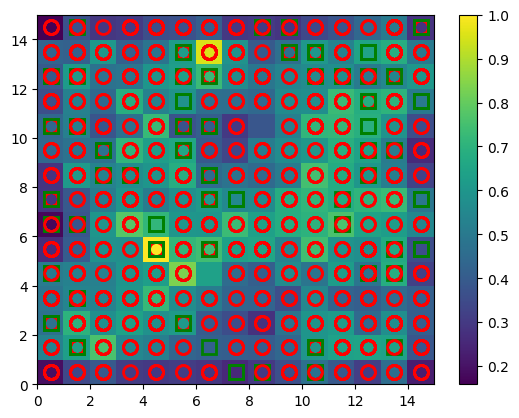

In [44]:
pcolor(model.distance_map().T)
colorbar()

markers = ['o', 's']
colors = ['r', 'g']

for i, element in enumerate(x):
    w = model.winner(element)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], markerfacecolor= 'None', markersize= 10, markeredgecolor= colors[y[i]], markeredgewidth= 2)

In [46]:
mapping = model.win_map(x)
mapping

defaultdict(list,
            {(8, 9): [array([0.        , 0.9231759 , 0.89209175, 0.58883739]),
              array([0.04502251, 0.88555995, 0.94488088, 0.54622831]),
              array([0.06403202, 0.98320605, 0.76999752, 0.53494606]),
              array([0.07503752, 0.99168174, 0.86463389, 0.78947487]),
              array([0.11505753, 0.91492837, 0.74581546, 0.56108804]),
              array([0.14607304, 0.95582021, 0.76894078, 0.69788224])],
             (14,
              9): [array([5.00250125e-04, 2.88121646e-01, 6.54707879e-01, 4.76826954e-01]), array([0.004002  , 0.41296337, 0.81542749, 0.3454094 ]), array([0.01150575, 0.15668515, 0.73863113, 0.36023692]), array([0.01850925, 0.24908572, 0.70061399, 0.31423393]), array([0.03101551, 0.23285166, 0.95757541, 0.37412386]), array([0.03451726, 0.26341331, 0.68626126, 0.33568686]), array([0.11805903, 0.29707836, 0.80384172, 0.43876045])],
             (4, 10): [array([0.0010005 , 0.74633429, 0.9811888 , 0.58262011]),
              

In [51]:
suspects = np.concatenate((mapping[(4, 5)], mapping[(6, 13)]), axis= 0)
suspects

array([[0.60030015, 0.89212414, 0.32682387, 0.81827683],
       [0.68934467, 0.99519088, 0.57688264, 1.        ],
       [0.71785893, 0.83675961, 0.25024275, 0.79701105],
       [0.7833917 , 0.93890061, 0.09768899, 0.89934912],
       [0.7863932 , 0.89936976, 0.22484469, 0.83506183],
       [0.7923962 , 0.94585764, 0.18886874, 0.97172083],
       [0.8084042 , 0.96683576, 0.3545402 , 0.93277323],
       [0.83391696, 0.91833222, 0.10309697, 0.94234278],
       [0.16208104, 0.84084423, 0.95814162, 0.55520775],
       [0.17208604, 0.83600631, 0.84724841, 0.40813463],
       [0.17858929, 0.80245223, 0.97686696, 0.5222044 ],
       [0.20210105, 0.85110366, 0.99898032, 0.33711858],
       [0.24062031, 0.72564276, 0.96511268, 0.59675812],
       [0.24212106, 0.71866914, 0.92994809, 0.40987548],
       [0.24912456, 0.58222493, 0.9457653 , 0.46404825],
       [0.26813407, 0.62237741, 0.88142384, 0.47006204],
       [0.28414207, 0.72220061, 0.97512053, 0.67924811],
       [0.30115058, 0.80089704,

In [52]:
suspects = normalizer.inverse_transform(suspects)
suspects

array([[1.20100000e+03, 6.46039209e+04, 3.30618318e+01, 1.12646912e+04],
       [1.37900000e+03, 6.97553202e+04, 4.45436823e+01, 1.37660512e+04],
       [1.43600000e+03, 6.18367356e+04, 2.95454866e+01, 1.09719746e+04],
       [1.56700000e+03, 6.69418649e+04, 2.25407356e+01, 1.23806247e+04],
       [1.57300000e+03, 6.49660656e+04, 2.83792937e+01, 1.14957311e+04],
       [1.58500000e+03, 6.72895857e+04, 2.67274005e+01, 1.33767977e+04],
       [1.61700000e+03, 6.83380974e+04, 3.43344715e+01, 1.28406967e+04],
       [1.66800000e+03, 6.59138320e+04, 2.27890518e+01, 1.29724184e+04],
       [3.25000000e+02, 6.20408896e+04, 6.20498010e+01, 7.64363105e+03],
       [3.45000000e+02, 6.17990850e+04, 5.69579610e+01, 5.61921760e+03],
       [3.58000000e+02, 6.01220116e+04, 6.29096049e+01, 7.18935074e+03],
       [4.05000000e+02, 6.25536684e+04, 6.39249756e+01, 4.64170478e+03],
       [4.82000000e+02, 5.62829825e+04, 6.23698886e+01, 8.21555838e+03],
       [4.85000000e+02, 5.59344326e+04, 6.07552498e

In [53]:
classes = []

for i in range(len(dataset)):
    for j in range(len(suspects)):
        if dataset.iloc[i, 0] == int(round(suspects[j, 0])):
            classes.append(dataset.iloc[i, 4])

classes = np.asarray(classes)

In [54]:
classes, classes.shape

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1],
       dtype=int64),
 (19,))

In [56]:
final_suspects = np.column_stack((suspects, classes))

final_suspects = final_suspects[final_suspects[:, 4].argsort()]

In [57]:
final_suspects

array([[1.20100000e+03, 6.46039209e+04, 3.30618318e+01, 1.12646912e+04,
        0.00000000e+00],
       [4.82000000e+02, 5.62829825e+04, 6.23698886e+01, 8.21555838e+03,
        0.00000000e+00],
       [3.58000000e+02, 6.01220116e+04, 6.29096049e+01, 7.18935074e+03,
        0.00000000e+00],
       [3.25000000e+02, 6.20408896e+04, 6.20498010e+01, 7.64363105e+03,
        0.00000000e+00],
       [1.66800000e+03, 6.59138320e+04, 2.27890518e+01, 1.29724184e+04,
        0.00000000e+00],
       [1.61700000e+03, 6.83380974e+04, 3.43344715e+01, 1.28406967e+04,
        0.00000000e+00],
       [3.45000000e+02, 6.17990850e+04, 5.69579610e+01, 5.61921760e+03,
        0.00000000e+00],
       [1.57300000e+03, 6.49660656e+04, 2.83792937e+01, 1.14957311e+04,
        0.00000000e+00],
       [1.56700000e+03, 6.69418649e+04, 2.25407356e+01, 1.23806247e+04,
        0.00000000e+00],
       [1.43600000e+03, 6.18367356e+04, 2.95454866e+01, 1.09719746e+04,
        0.00000000e+00],
       [1.37900000e+03, 6.9755

In [58]:
final_suspects[:, 0] = np.round(final_suspects[:, 0]).astype(int)
final_suspects[:, 0]

array([1201.,  482.,  358.,  325., 1668., 1617.,  345., 1573., 1567.,
       1436., 1379., 1585.,  603.,  405.,  485.,  499.,  537.,  569.,
        662.])